In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\ligio\Downloads\balanced_analysis_lung_balanced.csv")
df = pd.DataFrame(data)
df.head(10)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,67,0,0,0,0,1,1,1,1,1,1,1,0,1,1
1,1,52,1,0,0,0,1,1,1,1,1,0,0,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,0,1,0,1,0
3,1,78,0,1,0,1,1,1,0,1,0,0,1,1,1,1
4,1,60,0,1,1,0,0,1,0,1,1,1,1,1,1,1
5,0,67,0,1,0,0,0,0,0,1,0,1,1,0,0,0
6,1,74,0,1,0,1,0,1,1,1,1,1,1,0,1,1
7,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0
8,0,68,1,1,1,1,1,1,0,0,0,1,1,0,0,1
9,0,57,1,1,0,1,0,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 238 non-null    int64
 1   age                    238 non-null    int64
 2   smoking                238 non-null    int64
 3   yellow_fingers         238 non-null    int64
 4   anxiety                238 non-null    int64
 5   peer_pressure          238 non-null    int64
 6   chronic_disease        238 non-null    int64
 7   fatigue                238 non-null    int64
 8   allergy                238 non-null    int64
 9   wheezing               238 non-null    int64
 10  alcohol_consuming      238 non-null    int64
 11  coughing               238 non-null    int64
 12  shortness_of_breath    238 non-null    int64
 13  swallowing_difficulty  238 non-null    int64
 14  chest_pain             238 non-null    int64
 15  lung_cancer            238 non-null    i

In [4]:
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [5]:
df['lung_cancer'].value_counts()

lung_cancer
1    138
0    100
Name: count, dtype: int64

In [6]:
x = df.iloc[:,:-1]
y = df['lung_cancer']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [10]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [11]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(93.75, 91.57894736842105)

In [12]:
dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
dr.score(x_test,y_test)*100,dr.score(x_train,y_train)*100

(87.5, 99.47368421052632)

In [14]:
sc = SVC()
sc.fit(x_train,y_train)

SVC()

In [15]:
sc.score(x_test,y_test)*100,sc.score(x_train,y_train)*100

(64.58333333333334, 59.473684210526315)

In [16]:
sc.predict([[1,69,0,1,1,0,0,1,0,1,1,1,1,1,1]])

array([1], dtype=int64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
kn.score(x_train,y_train)*100,kn.score(x_test,y_test)*100

(85.78947368421052, 79.16666666666666)

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_test,y_test)*100,gb.score(x_train,y_train)*100

(95.83333333333334, 85.26315789473684)

In [22]:
li = [('Gb',GaussianNB()),('lr',LogisticRegression()),('kn',KNeighborsClassifier())]

In [23]:
vc = VotingClassifier(li,verbose=True)
vc.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing Gb, total=   0.0s
[Voting] ....................... (2 of 3) Processing lr, total=   0.0s
[Voting] ....................... (3 of 3) Processing kn, total=   0.0s


VotingClassifier(estimators=[('Gb', GaussianNB()), ('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier())],
                 verbose=True)

In [24]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(91.57894736842105, 93.75)

In [25]:
d = {'gb':gb.predict(x_test),'kn':kn.predict(x_test),'lr':lr.predict(x_test),'vc':vc.predict(x_test)}

In [26]:
pd.DataFrame(d)

,gb,kn,lr,vc
0,1,1,1,1
1,0,0,0,0
2,1,0,1,1
3,1,0,1,1
4,1,1,1,1
5,0,0,0,0
6,0,0,0,0
7,1,1,1,1
8,0,0,0,0
9,1,1,1,1


In [35]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [28]:
c = confusion_matrix(y_test,vc.predict(x_test))
c

array([[18,  1],
       [ 2, 27]], dtype=int64)

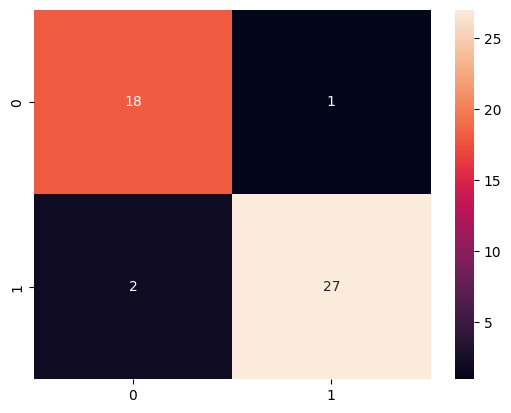

In [29]:
sns.heatmap(c,annot=True)
plt.show()

In [37]:
precision_score(y_test,vc.predict(x_test))*100

96.42857142857143

In [38]:
recall_score(y_test,vc.predict(x_test))*100

93.10344827586206

In [39]:
f1_score(y_test,vc.predict(x_test))*100

94.73684210526315

In [30]:
vc.predict([[0,20,1,0,0,0,0,1,0,1,0,0,0,0,1]])

array([0], dtype=int64)

In [31]:
import pickle

In [32]:
pickle.dump(vc,open('lung_c.pkl','wb'))

In [33]:
p = pickle.load(open('lung_c.pkl','rb'))

In [34]:
p.predict([[0,20,1,0,0,0,0,1,0,1,0,0,0,0,1]])

array([0], dtype=int64)